In [1]:
import pandas as pd
import plotly.express as px
from copy import copy
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np
import plotly.figure_factory as ff
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from tensorflow import keras
import os

In [2]:
#ignore warning
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Connect to the AWS cloud database and download the data.
%run Connect_Database.ipynb

Enter database password········
('INTC', 17.0, 4.0, 6.0, 7.0, datetime.datetime(2022, 2, 1, 0, 0), 'LAG_PERF', 'Semiconductors', 3.0, 31, 14.57, 'Customer Incidents,Business Ethics Incidents', 11.6, 21.21967741935484, 32.93, 2.53, 8.044999999999998, 16.08, 2.62, 6.166333333333333, 9.51, 4.79, 6.668666666666666, 9.67, 0.0, 1.1290322580645162, 4.0, 'None')


In [4]:
# Checking the company profile including esg 
esg_info_df

Ticker  totalScore  eScore  sScore  gScore  lastRated esgPerformance  \
0    INTC        17.0     4.0     6.0     7.0 2022-02-01       LAG_PERF   
1    MSFT        13.0     0.0     8.0     5.0 2022-02-01       LAG_PERF   
2     BAC        27.0     2.0    14.0    11.0 2022-02-01  Not Available   
3    AAPL        16.3     0.6     6.9     8.8 2022-02-01     UNDER_PERF   
4    NVDA        12.8     2.5     4.1     6.1 2022-02-01     UNDER_PERF   
..    ...         ...     ...     ...     ...        ...            ...   
60    DLR        13.0     3.2     3.7     6.1 2022-02-01     UNDER_PERF   
61    COF        23.2     0.1    13.5     9.7 2022-02-01       AVG_PERF   
62    BBY        14.3     2.2     7.3     4.8 2022-02-01     UNDER_PERF   
63    KMB        22.2     8.1     7.8     6.4 2022-02-01       AVG_PERF   
64    EMN        24.8    11.5     5.5     7.8 2022-02-01       AVG_PERF   

                 peerGroup  highestControversy  peerCount  ...  bookValue  \
0           Semiconductors                 3.0         31  ...     22.151   
1      Software & Services                 3.0        105  ...     21.335   
2                    Banks                 3.0        175  ...     30.374   
3      Technology Hardware                 3.0         55  ...      4.402   
4           Semiconductors                 2.0         31  ...     10.619   
..                     ...                 ...        ...  ...        ...   
60             Real Estate                 0.0        108  ...     58.279   
61  Diversified Financials                 4.0         89  ...    133.911   
62               Retailing                 2.0         57  ...     17.547   
63      Household Products                 2.0         28  ...      1.526   
64               Chemicals                 2.0         77  ...     45.522   

   returnOnAssets  returnOnEquity  averageVolume    volume  currentPrice  \
0         0.08586         0.22522       39784168  33249492       51.8300   
1         0.15249         0.49051       37807347  14327104      307.1974   
2         0.01068         0.11778       55160016  19239484       43.0200   
3         0.19875         1.45567       93700745  51356493      174.2850   
4         0.17199         0.44832       52434636  24961081      276.8399   
..            ...             ...            ...       ...           ...   
60        0.01308         0.09442        1634014    819189      138.2300   
61        0.02959         0.20556        3024740   2240666      135.8800   
62        0.10162         0.63223        3214070   1679729       96.3000   
63        0.10050         2.29639        2023524   1778481      120.2800   
64        0.05295         0.08428        1296685    877798      110.6900   

    fiftyTwoWeekLow  fiftyTwoWeekHigh  regularMarketPrice      marketCap  
0             43.63             68.49             51.8300   210792628224  
1            231.10            349.67            307.1974  2306201616384  
2             36.51             50.11             43.0200   346950303744  
3            118.86            182.94            174.2900  2844308013056  
4            127.00            346.47            276.8399   689885020160  
..              ...               ...                 ...            ...  
60           130.10            178.22            138.2300    39227875328  
61           122.43            177.95            135.8800    57833521152  
62            85.58            141.97             96.3000    23166023680  
63           117.32            145.79            120.2800    40525701120  
64            98.24            130.47            110.6900    14881164288  

[65 rows x 53 columns]

In [5]:
# Historical data on company stocks
stocks_df

Ticker       Date        Open        High         Low       Close  \
0       INTC 2018-03-16   51.169998   51.700001   50.990002   51.169998   
1       INTC 2018-03-19   50.740002   51.230000   49.930000   50.830002   
2       INTC 2018-03-20   50.880001   51.810001   50.849998   51.549999   
3       INTC 2018-03-21   51.549999   52.169998   51.169998   51.560001   
4       INTC 2018-03-22   50.740002   51.959999   50.599998   50.830002   
...      ...        ...         ...         ...         ...         ...   
64443    EMN 2022-03-09  107.809998  109.629997  107.349998  108.709999   
64444    EMN 2022-03-10  107.580002  107.889999  105.760002  106.889999   
64445    EMN 2022-03-11  107.440002  107.660004  105.389999  105.419998   
64446    EMN 2022-03-14  105.839996  107.209999  104.370003  106.080002   
64447    EMN 2022-03-15  106.709999  107.199997  104.540001  106.000000   

        Adj Close      Volume  
0       47.260136  42559800.0  
1       46.946121  31115200.0  
2       47.611103  22215000.0  
3       47.620346  23239500.0  
4       46.946121  30916000.0  
...           ...         ...  
64443  107.926285   2445400.0  
64444  106.119400   1750700.0  
64445  104.660004   1610800.0  
64446  106.080002   1504800.0  
64447  106.000000   1208900.0  

[64448 rows x 8 columns]

In [6]:
# Got the closing price for all stocks
def create_df(df, index, column, value):
    stocks_df = df.copy()
    stocks_df = stocks_df.pivot(index=index, columns=column, values=value)
    stocks_df = stocks_df.reset_index()
    stocks_df['Date'] = pd.to_datetime(stocks_df['Date'])
    stocks_df = stocks_df.sort_values(by = ['Date'])
    return stocks_df

In [7]:
# Get price of stocks, sorted by date
stock_price_df = create_df(stocks_df, 'Date', 'Ticker', 'Close')
stock_price_df

Ticker       Date        AAPL         ABT         ACN        ADM        AEP  \
0      2018-03-16   44.505001   63.180000  160.889999  43.500000  67.809998   
1      2018-03-19   43.825001   62.259998  160.619995  43.060001  67.449997   
2      2018-03-20   43.810001   62.650002  162.880005  42.970001  67.449997   
3      2018-03-21   42.817501   62.419998  162.029999  42.619999  66.910004   
4      2018-03-22   42.212502   60.930000  150.229996  41.939999  67.360001   
...           ...         ...         ...         ...        ...        ...   
1002   2022-03-09  162.949997  118.389999  309.420013  81.779999  95.010002   
1003   2022-03-10  158.520004  117.000000  309.519989  84.309998  95.989998   
1004   2022-03-11  154.729996  114.019997  311.579987  83.599998  95.540001   
1005   2022-03-14  150.619995  115.519997  307.679993  82.570000  94.739998   
1006   2022-03-15  155.089996  117.480003  316.230011  82.809998  96.110001   

Ticker        AES        AMAT        AMGN        ANTM  ...          PG  \
0       10.840000   59.439999  188.240005  228.110001  ...   78.970001   
1       10.770000   58.500000  182.550003  227.990005  ...   78.660004   
2       10.710000   59.230000  182.029999  229.979996  ...   78.309998   
3       10.800000   60.779999  181.589996  225.990005  ...   77.040001   
4       10.820000   58.959999  176.080002  218.850006  ...   76.410004   
...           ...         ...         ...         ...  ...         ...   
1002    21.959999  128.619995  231.460007  465.369995  ...  148.770004   
1003    22.350000  124.970001  226.949997  473.200012  ...  144.940002   
1004    22.200001  123.639999  228.850006  465.260010  ...  143.220001   
1005    21.719999  120.129997  229.210007  458.329987  ...  145.050003   
1006    22.340000  124.410004  231.559998  467.690002  ...  150.270004   

Ticker        QCOM         RF        SPGI        SYF          T         UNH  \
0        60.619999  19.629999  192.509995  35.200001  37.000000  227.860001   
1        58.369999  19.549999  190.449997  35.259998  36.580002  225.050003   
2        58.259998  19.459999  195.649994  35.400002  36.340000  226.779999   
3        56.810001  19.530001  193.809998  35.299999  36.000000  222.820007   
4        55.580002  18.620001  189.080002  33.730000  35.369999  215.210007   
...            ...        ...         ...        ...        ...         ...   
1002    157.110001  22.450001  391.510010  36.200001  23.260000  485.570007   
1003    154.710007  22.000000  382.750000  35.430000  23.190001  491.440002   
1004    152.339996  21.910000  379.679993  35.040001  23.190001  482.869995   
1005    141.289993  22.719999  377.000000  35.480000  22.889999  487.920013   
1006    144.210007  22.790001  387.390015  36.139999  23.090000  497.910004   

Ticker         UPS         VZ        WFC  
0       110.910004  48.560001  55.900002  
1       108.459999  48.310001  55.480000  
2       108.029999  47.689999  54.900002  
3       107.650002  47.279999  54.790001  
4       104.449997  46.880001  52.529999  
...            ...        ...        ...  
1002    206.779999  53.080002  49.160000  
1003    207.179993  53.230000  49.009998  
1004    203.899994  53.040001  48.470001  
1005    204.300003  52.500000  49.860001  
1006    210.529999  52.759998  50.110001  

[1007 rows x 65 columns]

In [8]:
# Get volume of stocks, sorted by date
stock_vol_df = create_df(stocks_df, 'Date', 'Ticker', 'Volume')
stock_vol_df

Ticker       Date         AAPL         ABT        ACN         ADM        AEP  \
0      2018-03-16  157618800.0  11840900.0  4018600.0  10091100.0  6399400.0   
1      2018-03-19  133787200.0   5286200.0  1890000.0   4270500.0  2595600.0   
2      2018-03-20   78597600.0   3943000.0  2249400.0   2133700.0  2496400.0   
3      2018-03-21  148219600.0   3478300.0  3452600.0   3078300.0  2805300.0   
4      2018-03-22  165963200.0   5345300.0  8203600.0   2645500.0  3137500.0   
...           ...          ...         ...        ...         ...        ...   
1002   2022-03-09   91454900.0   5004700.0  2825900.0   5769900.0  3006200.0   
1003   2022-03-10  105342000.0   4377600.0  2049000.0   3395900.0  2897900.0   
1004   2022-03-11   96836300.0   8012400.0  3811900.0   3016900.0  2254900.0   
1005   2022-03-14  108732100.0   5527500.0  3156600.0   3647200.0  2948400.0   
1006   2022-03-15   92964300.0   5041200.0  2695200.0   3693000.0  3673700.0   

Ticker        AES        AMAT        AMGN       ANTM  ...          PG  \
0       7325800.0  15070200.0  16878400.0  1834700.0  ...  17715400.0   
1       5646600.0  13747300.0   3970400.0  1088800.0  ...   8368200.0   
2       6359700.0   8527300.0   2582200.0  1326100.0  ...   8465500.0   
3       5687900.0  17171400.0   2531100.0  1316300.0  ...   9822800.0   
4       7888900.0  14876400.0   3553000.0  1571900.0  ...  10481600.0   
...           ...         ...         ...        ...  ...         ...   
1002    6540500.0   7623200.0   2640900.0  1168300.0  ...   7044100.0   
1003    3953100.0   5604400.0   3957200.0  1243000.0  ...   9221000.0   
1004    4679500.0   6013200.0   2667000.0  1074500.0  ...   7085800.0   
1005    5516900.0   6733200.0   2902700.0  1427800.0  ...   7964600.0   
1006    4247700.0   6875300.0   3178200.0  1303900.0  ...   9868400.0   

Ticker        QCOM          RF       SPGI         SYF           T        UNH  \
0       25574500.0  22955400.0  1836600.0  13767800.0  37103000.0  5690300.0   
1       14131400.0  10701000.0  1160400.0   7071400.0  19637900.0  3407300.0   
2       10615400.0  10213200.0  1289500.0   4799800.0  20167100.0  3429100.0   
3       12231900.0   6715800.0  1471800.0   4325100.0  17437200.0  3419800.0   
4       13554600.0  12313200.0  1293200.0   5728000.0  28196900.0  5894800.0   
...            ...         ...        ...         ...         ...        ...   
1002     9276800.0  10750000.0  3034100.0   7234900.0  43814900.0  3115500.0   
1003     8888800.0   8808200.0  2767300.0   7169200.0  40500800.0  2834800.0   
1004     7392100.0   8355500.0  2252100.0   5767400.0  54451800.0  2615000.0   
1005    16154200.0  10280300.0  2558100.0   7635800.0  49609800.0  2704100.0   
1006    13893000.0  10312400.0  1977200.0   6824800.0  35565900.0  3043000.0   

Ticker        UPS          VZ         WFC  
0       5679200.0  26838100.0  37095000.0  
1       3351200.0  12980800.0  17982200.0  
2       2513000.0  10765500.0  26874600.0  
3       2805100.0  11062500.0  18997300.0  
4       4150000.0  14270800.0  32656300.0  
...           ...         ...         ...  
1002    3097600.0  23049800.0  34560200.0  
1003    2284100.0  17501800.0  26178800.0  
1004    2006200.0  20834600.0  23695900.0  
1005    2237200.0  23124100.0  28166600.0  
1006    2865400.0  20477600.0  25080600.0  

[1007 rows x 65 columns]

In [9]:
# Check if Null values exist in stock prices data
stock_price_df.isnull().sum()

Ticker
Date    0
AAPL    0
ABT     0
ACN     0
ADM     0
       ..
T       0
UNH     0
UPS     0
VZ      0
WFC     0
Length: 65, dtype: int64

In [10]:
# Check if Null values exist in stocks volume data
stock_vol_df.isnull().sum()

Ticker
Date    0
AAPL    0
ABT     0
ACN     0
ADM     0
       ..
T       0
UNH     0
UPS     0
VZ      0
WFC     0
Length: 65, dtype: int64

In [11]:
# Get stock prices dataframe info
stock_price_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 0 to 1006
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1007 non-null   datetime64[ns]
 1   AAPL    1007 non-null   float64       
 2   ABT     1007 non-null   float64       
 3   ACN     1007 non-null   float64       
 4   ADM     1007 non-null   float64       
 5   AEP     1007 non-null   float64       
 6   AES     1007 non-null   float64       
 7   AMAT    1007 non-null   float64       
 8   AMGN    1007 non-null   float64       
 9   ANTM    1007 non-null   float64       
 10  AXP     1007 non-null   float64       
 11  BBY     1007 non-null   float64       
 12  BDX     1007 non-null   float64       
 13  BLK     1007 non-null   float64       
 14  C       1007 non-null   float64       
 15  CI      1007 non-null   float64       
 16  CL      1007 non-null   float64       
 17  CLX     1007 non-null   float64       
 18  COF     

In [12]:
# Get stock volume dataframe info
stock_vol_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1007 entries, 0 to 1006
Data columns (total 65 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    1007 non-null   datetime64[ns]
 1   AAPL    1007 non-null   float64       
 2   ABT     1007 non-null   float64       
 3   ACN     1007 non-null   float64       
 4   ADM     1007 non-null   float64       
 5   AEP     1007 non-null   float64       
 6   AES     1007 non-null   float64       
 7   AMAT    1007 non-null   float64       
 8   AMGN    1007 non-null   float64       
 9   ANTM    1007 non-null   float64       
 10  AXP     1007 non-null   float64       
 11  BBY     1007 non-null   float64       
 12  BDX     1007 non-null   float64       
 13  BLK     1007 non-null   float64       
 14  C       1007 non-null   float64       
 15  CI      1007 non-null   float64       
 16  CL      1007 non-null   float64       
 17  CLX     1007 non-null   float64       
 18  COF     

In [13]:
# Statistical desctiption of stocks volume
stock_vol_df.describe()

Ticker          AAPL           ABT           ACN           ADM           AEP  \
count   1.007000e+03  1.007000e+03  1.007000e+03  1.007000e+03  1.007000e+03   
mean    1.212976e+08  5.840448e+06  2.139810e+06  3.132424e+06  2.809215e+06   
std     5.689916e+07  3.110829e+06  9.318082e+05  1.362099e+06  1.300774e+06   
min     4.100000e+07  1.067700e+06  5.281000e+05  4.116000e+05  4.401000e+05   
25%     8.358420e+07  4.105850e+06  1.567750e+06  2.242350e+06  2.083450e+06   
50%     1.064352e+08  5.130300e+06  1.932600e+06  2.780800e+06  2.532000e+06   
75%     1.426222e+08  6.568200e+06  2.395450e+06  3.661050e+06  3.211800e+06   
max     4.265100e+08  4.754020e+07  8.561500e+06  1.136810e+07  2.245570e+07   

Ticker           AES          AMAT          AMGN          ANTM           AXP  \
count   1.007000e+03  1.007000e+03  1.007000e+03  1.007000e+03  1.007000e+03   
mean    5.869969e+06  9.422596e+06  2.827744e+06  1.419159e+06  3.963367e+06   
std     2.316542e+06  4.411325e+06  1.292352e+06  7.078956e+05  2.015011e+06   
min     9.862000e+05  1.409200e+06  6.128000e+05  2.245000e+05  7.070000e+05   
25%     4.219500e+06  6.432100e+06  2.086100e+06  9.778500e+05  2.704050e+06   
50%     5.518400e+06  8.413900e+06  2.548900e+06  1.247200e+06  3.380900e+06   
75%     7.041050e+06  1.128855e+07  3.184000e+06  1.647050e+06  4.533550e+06   
max     2.101100e+07  5.258420e+07  1.687840e+07  7.352000e+06  1.726170e+07   

Ticker  ...            PG          QCOM            RF          SPGI  \
count   ...  1.007000e+03  1.007000e+03  1.007000e+03  1.007000e+03   
mean    ...  8.137602e+06  1.124976e+07  1.047984e+07  1.376994e+06   
std     ...  3.453056e+06  8.192157e+06  4.566209e+06  7.454552e+05   
min     ...  2.022100e+06  2.120200e+06  2.588200e+06  3.630000e+05   
25%     ...  6.023050e+06  7.199550e+06  7.528500e+06  9.229000e+05   
50%     ...  7.334900e+06  9.471700e+06  9.464600e+06  1.207800e+06   
75%     ...  9.186750e+06  1.278855e+07  1.236490e+07  1.613200e+06   
max     ...  3.309570e+07  1.560193e+08  5.115560e+07  9.770400e+06   

Ticker           SYF             T           UNH           UPS            VZ  \
count   1.007000e+03  1.007000e+03  1.007000e+03  1.007000e+03  1.007000e+03   
mean    6.121506e+06  3.883083e+07  3.641170e+06  3.459490e+06  1.628516e+07   
std     3.651345e+06  1.982001e+07  2.071274e+06  1.998522e+06  6.758625e+06   
min     8.444000e+05  8.697200e+06  7.140000e+05  8.359000e+05  5.763700e+06   
25%     4.170500e+06  2.708660e+07  2.516100e+06  2.372300e+06  1.190225e+07   
50%     5.271100e+06  3.381840e+07  3.094300e+06  2.943100e+06  1.482170e+07   
75%     7.119800e+06  4.431680e+07  4.162050e+06  3.925850e+06  1.863140e+07   
max     6.933200e+07  2.470524e+08  2.736140e+07  3.097090e+07  5.540630e+07   

Ticker           WFC  
count   1.007000e+03  
mean    2.851028e+07  
std     1.464035e+07  
min     4.635500e+06  
25%     1.819330e+07  
50%     2.386540e+07  
75%     3.493305e+07  
max     1.189526e+08  

[8 rows x 64 columns]

In [14]:
# Statistical desctiption of stocks price
stock_price_df.describe()

Ticker         AAPL          ABT          ACN          ADM          AEP  \
count   1007.000000  1007.000000  1007.000000  1007.000000  1007.000000   
mean      90.187187    93.883148   224.918997    49.420983    83.281897   
std       43.161803    22.392827    67.350804    10.458563     8.160328   
min       35.547501    57.570000   133.669998    29.309999    62.930000   
25%       50.671249    75.789997   168.635002    42.240002    78.779999   
50%       74.702499    88.300003   201.589996    46.000000    84.139999   
75%      128.464996   116.570000   265.615005    57.485001    89.334999   
max      182.009995   141.460007   415.420013    84.309998   104.330002   

Ticker          AES         AMAT         AMGN         ANTM          AXP  ...  \
count   1007.000000  1007.000000  1007.000000  1007.000000  1007.000000  ...   
mean      18.675213    75.646117   213.830646   306.662781   123.680626  ...   
std        4.783247    39.463232    24.585995    63.387123    28.077615  ...   
min        9.560000    28.990000   166.050003   174.679993    68.959999  ...   
25%       14.765000    45.934999   193.009995   264.145004   101.615002  ...   
50%       17.670000    57.860001   215.110001   286.500000   117.349998  ...   
75%       23.320000   118.424999   234.985001   343.190002   142.989998  ...   
max       28.910000   167.000000   260.950012   476.839996   198.380005  ...   

Ticker           PG         QCOM           RF         SPGI          SYF  \
count   1007.000000  1007.000000  1007.000000  1007.000000  1007.000000   
mean     118.755055   100.542205    17.005114   296.940358    34.542423   
std       23.732809    39.589642     3.892581    89.006094     8.597946   
min       70.940002    49.400002     7.360000   159.000000    12.800000   
25%      101.415001    66.695004    14.575000   211.405006    29.690001   
50%      122.480003    86.989998    16.549999   289.579987    33.849998   
75%      137.689995   135.389999    19.615001   361.210007    39.635000   
max      164.210007   189.279999    25.410000   478.970001    52.360001   

Ticker            T          UNH          UPS           VZ          WFC  
count   1007.000000  1007.000000  1007.000000  1007.000000  1007.000000  
mean      30.949176   313.055313   140.926971    55.938133    44.170050  
std        3.796162    76.991150    40.815800     3.368892    10.519539  
min       22.170000   194.860001    86.169998    46.290001    21.139999  
25%       28.735000   250.695000   108.520000    54.055000    38.125000  
50%       30.440001   288.239990   118.610001    56.459999    47.560001  
75%       32.669998   362.720001   172.709999    58.424999    52.055000  
max       39.630001   505.579987   232.110001    62.070000    59.189999  

[8 rows x 64 columns]

In [15]:
# Function to plot interactive plots using Plotly Express
def create_plot(df, title, name = ''):
    title = name +  ' ' + title
    fig = px.line(title = title)
    for i in df.columns[1:]:
        fig.add_scatter(x = df['Date'], y = df[i], name = i)
        
    fig.update_layout(
    width=1000,
    height=500
    )
    
    fig.write_image("Images/Sample_Stock_prediction.png", engine="kaleido")
    fig.show()

In [16]:
# Top 10 esg companies
top_esg = esg_info_df.nlargest(n=10, columns=['totalScore'])
top_esg

Ticker  totalScore  eScore  sScore  gScore  lastRated esgPerformance  \
39    ADM        36.4    18.2    13.2     5.0 2022-02-01       OUT_PERF   
51    AES        35.0    20.8     8.3     5.9 2022-02-01       OUT_PERF   
19    WFC        32.8     1.9    15.4    15.5 2022-02-01       OUT_PERF   
22    AEP        30.5    17.8     7.2     5.6 2022-02-01       OUT_PERF   
40    ETR        30.3    16.2     7.4     6.6 2022-02-01       OUT_PERF   
16      F        29.6     9.3    11.3     9.0 2022-02-01       AVG_PERF   
21    JPM        29.3     1.1    16.6    11.6 2022-02-01       AVG_PERF   
30    LMT        28.8     5.3    15.9     7.6 2022-02-01       AVG_PERF   
37    NOC        28.5     7.5    15.7     5.3 2022-02-01       AVG_PERF   
49    BDX        28.3     3.8    15.1     9.3 2022-02-01       AVG_PERF   

              peerGroup  highestControversy  peerCount  ...  bookValue  \
39        Food Products                 3.0         94  ...     39.301   
51            Utilities                 2.0        107  ...      3.658   
19                Banks                 5.0        175  ...     42.441   
22            Utilities                 2.0        107  ...     44.240   
40            Utilities                 2.0        107  ...     55.990   
16          Automobiles                 3.0         37  ...      9.157   
21                Banks                 3.0        175  ...     86.355   
30  Aerospace & Defense                 3.0         22  ...     35.150   
37  Aerospace & Defense                 3.0         22  ...     71.913   
49           Healthcare                 3.0         58  ...     83.223   

   returnOnAssets  returnOnEquity  averageVolume    volume  currentPrice  \
39        0.03548         0.12636        3600686   4800824         93.49   
51        0.04867         0.15587        6051742   5146760         24.37   
19        0.01034         0.10750       32792819  19127493         52.56   
22        0.02588         0.11048        3298891   2032224         96.84   
40        0.02146         0.09682        1265232    767923        114.83   
16        0.02524         0.45095      104398950  62023077         16.47   
21        0.01356         0.16856       16791663   8386416        141.92   
30        0.09624         0.74307        2529629   1645894        453.66   
37        0.10763         0.59604        1086434    480506        458.18   
49        0.03904         0.08819        1371824    722780        265.67   

    fiftyTwoWeekLow  fiftyTwoWeekHigh  regularMarketPrice     marketCap  
39            56.91             93.50               93.49   52302139392  
51            19.76             28.86               24.37   16247820288  
19            37.90             60.30               52.56  209568808960  
22            80.22             98.15               96.84   48070406144  
40            97.46            115.05              114.83   23078647808  
16            11.14             25.87               16.47   65818066944  
21           127.27            172.96              141.92  429782007808  
30           324.23            479.99              453.66  125113073664  
37           319.70            490.82              458.18   72089124864  
49           235.13            280.62              265.67   75727380480  

[10 rows x 53 columns]

In [17]:
def stock_ticker_based(df, cols):
    # stock dataframe based on tickers e.g. top esg , value e.g. close price or volume
    df = df.loc[:, cols]
    return df

In [18]:
# Selecting the type of tickers you want to predict
cols = top_esg['Ticker'].tolist()
cols.insert(0, 'Date')

In [19]:
#fetching stocks price based on tickers
stock_price_ticker_df = stock_ticker_based(stock_price_df, cols)
print(stock_price_ticker_df.dtypes)
stock_price_ticker_df

Ticker
Date    datetime64[ns]
ADM            float64
AES            float64
WFC            float64
AEP            float64
ETR            float64
F              float64
JPM            float64
LMT            float64
NOC            float64
BDX            float64
dtype: object


Ticker       Date        ADM        AES        WFC        AEP         ETR  \
0      2018-03-16  43.500000  10.840000  55.900002  67.809998   78.879997   
1      2018-03-19  43.060001  10.770000  55.480000  67.449997   78.540001   
2      2018-03-20  42.970001  10.710000  54.900002  67.449997   78.760002   
3      2018-03-21  42.619999  10.800000  54.790001  66.910004   78.250000   
4      2018-03-22  41.939999  10.820000  52.529999  67.360001   78.349998   
...           ...        ...        ...        ...        ...         ...   
1002   2022-03-09  81.779999  21.959999  49.160000  95.010002  107.980003   
1003   2022-03-10  84.309998  22.350000  49.009998  95.989998  109.010002   
1004   2022-03-11  83.599998  22.200001  48.470001  95.540001  108.750000   
1005   2022-03-14  82.570000  21.719999  49.860001  94.739998  110.269997   
1006   2022-03-15  82.809998  22.340000  50.110001  96.110001  111.250000   

Ticker          F         JPM         LMT         NOC         BDX  
0       11.150000  115.440002  331.399994  338.630005  223.270004  
1       11.010000  114.529999  335.250000  344.929993  219.529999  
2       10.990000  114.639999  335.600006  347.579987  219.899994  
3       11.100000  114.739998  335.470001  347.220001  218.500000  
4       10.750000  109.949997  327.149994  338.829987  213.250000  
...           ...         ...         ...         ...         ...  
1002    16.370001  133.440002  448.720001  449.920013  264.839996  
1003    16.330000  131.860001  444.359985  444.609985  257.720001  
1004    16.040001  128.889999  439.040009  436.299988  254.509995  
1005    15.740000  130.169998  444.450012  441.420013  256.799988  
1006    16.059999  132.479996  448.670013  447.820007  258.690002  

[1007 rows x 11 columns]

In [20]:
#fetching stocks volume based on tickers
stock_vol_ticker_df = stock_ticker_based(stock_vol_df, cols)
print(stock_vol_ticker_df.dtypes)
stock_vol_ticker_df

Ticker
Date    datetime64[ns]
ADM            float64
AES            float64
WFC            float64
AEP            float64
ETR            float64
F              float64
JPM            float64
LMT            float64
NOC            float64
BDX            float64
dtype: object


Ticker       Date         ADM        AES         WFC        AEP        ETR  \
0      2018-03-16  10091100.0  7325800.0  37095000.0  6399400.0  3495500.0   
1      2018-03-19   4270500.0  5646600.0  17982200.0  2595600.0  1325400.0   
2      2018-03-20   2133700.0  6359700.0  26874600.0  2496400.0  1520100.0   
3      2018-03-21   3078300.0  5687900.0  18997300.0  2805300.0  1172100.0   
4      2018-03-22   2645500.0  7888900.0  32656300.0  3137500.0  1175000.0   
...           ...         ...        ...         ...        ...        ...   
1002   2022-03-09   5769900.0  6540500.0  34560200.0  3006200.0  1833100.0   
1003   2022-03-10   3395900.0  3953100.0  26178800.0  2897900.0  1166900.0   
1004   2022-03-11   3016900.0  4679500.0  23695900.0  2254900.0   885500.0   
1005   2022-03-14   3647200.0  5516900.0  28166600.0  2948400.0   811200.0   
1006   2022-03-15   3693000.0  4247700.0  25080600.0  3673700.0  1181400.0   

Ticker           F         JPM        LMT        NOC        BDX  
0       80684200.0  19888900.0  4718100.0  1268900.0  1451400.0  
1       63122500.0  13214900.0  1502900.0  1004200.0  1161900.0  
2       45612800.0   9921200.0  1153900.0   634100.0   716500.0  
3       38551000.0  13633000.0  1270500.0   607000.0   754000.0  
4       51280900.0  22550400.0  1536300.0   770400.0  1019200.0  
...            ...         ...        ...        ...        ...  
1002    62846700.0  17536200.0  3477300.0  1730700.0  1231600.0  
1003    72992600.0  15604200.0  3049600.0  1442900.0  1990500.0  
1004    54918300.0  20055900.0  2647600.0  1175000.0  1304400.0  
1005    66341700.0  15786900.0  2475700.0   913600.0  1330200.0  
1006    65263700.0  15096600.0  1778700.0   827500.0  1160500.0  

[1007 rows x 11 columns]

In [21]:
# plot a line chart for stocks prices
create_plot(stock_price_ticker_df[1:], 'Stock Prices')

In [22]:
# plot a line chart for stocks volumes 
create_plot(stock_vol_ticker_df[1:], 'Stock Volumes')

In [23]:
# Function to concatenate the date, stock price, and volume in one dataframe for a single stock
def each_ticker(price_df, vol_df, name):
    return pd.DataFrame({'Date': price_df['Date'], 'Close': price_df[name], 'Volume': vol_df[name]})

In [24]:
# Function to return the input/output (target) data for AI/ML Model
# Note that our goal is to predict the future stock price 
# Target stock price today will be tomorrow's price 
def set_target(data):
  
    # 1 day window 
    n = 1

    # Create a column containing the prices for the next 1 days
    data['Target'] = data[['Close']].shift(-n)
  
    # return the new dataset 
    return data

In [25]:
def generate_prediction(price_df, vol_df, name):
    # Get individual stock prices and volumes for the given stock and generate the 
    price_volume_df = each_ticker(stock_price_df, stock_vol_df, name)
    price_volume_target_df = set_target(price_volume_df)
    
    # Remove the last row as it will be a null value
    price_volume_target_df = price_volume_target_df[:-1]
    
    # Scale the data
    from sklearn.preprocessing import MinMaxScaler
    sc = MinMaxScaler(feature_range = (0, 1))
    price_volume_target_scaled_df = sc.fit_transform(price_volume_target_df.drop(columns = ['Date']))
    
    # Creating Feature and Target
    X = price_volume_target_scaled_df[:,:2]
    y = price_volume_target_scaled_df[:,2:]
    
    # Spliting the data manually, since order is important in time-series
    split = int(0.65 * len(X))
    X_train = X[:split]
    y_train = y[:split]
    X_test = X[split:]
    y_test = y[split:]
    
    # Define a data plotting function
    def show_plot(data, name, title):
        plt.figure(figsize = (13, 5))
        plt.plot(data, linewidth = 3, label = ['Price', 'Volume'])
        title = name + title
        plt.title(title)
        plt.grid()
        plt.legend(loc="upper left")
        plt.savefig('Images/Sample_Price_Volume_Training_Test_Data_Plots.png')

    show_plot(X_train, name, ': Training Data')
    show_plot(X_test, name, ': Testing Data')
    
    from sklearn.linear_model import Ridge
    # Note that Ridge regression performs linear least squares with L2 regularization.
    # Create and train the Ridge Linear Regression  Model
    regression_model = Ridge()
    regression_model.fit(X_train, y_train)
    
    # Test the model and calculate its accuracy 
    lr_accuracy = regression_model.score(X_test, y_test)
    print("Linear Regression Score: ", lr_accuracy)
    
    # Make Prediction
    predicted_prices = regression_model.predict(X)
    predicted_prices

    # Append the predicted values into a list
    Predicted = []
    for i in predicted_prices:
        Predicted.append(i[0])
        
    # Append the close values to the list
    close = []
    for i in price_volume_target_scaled_df:
        close.append(i[0])
        
    # Create a dataframe based on the dates in the individual stock data
    df_predicted = price_volume_target_df[['Date']]
    
    # Add the close values to the dataframe
    df_predicted['Close'] = close

    # Add the predicted values to the dataframe
    df_predicted['Prediction'] = Predicted
    
    # Plot the results
    create_plot(df_predicted, "Original Vs. Prediction", name)
    


Linear Regression Score:  0.662542018872996


Linear Regression Score:  0.7771430773391051


Linear Regression Score:  0.9880968994116734


Linear Regression Score:  0.9409661545024238


Linear Regression Score:  0.9415978876252479


Linear Regression Score:  0.7058573437043001


Linear Regression Score:  0.8870379065888369


Linear Regression Score:  0.9484995611307654


Linear Regression Score:  0.9623626997953932


Linear Regression Score:  0.8919720145693179


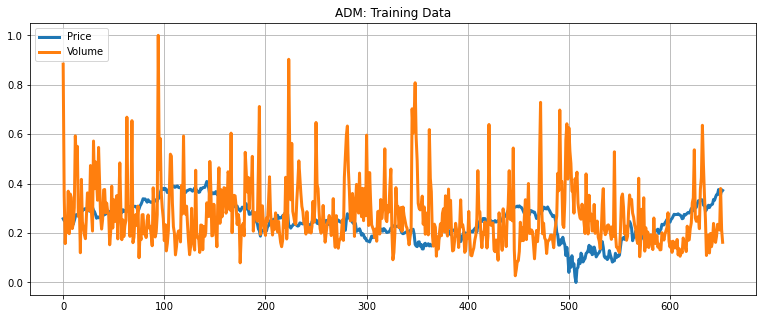

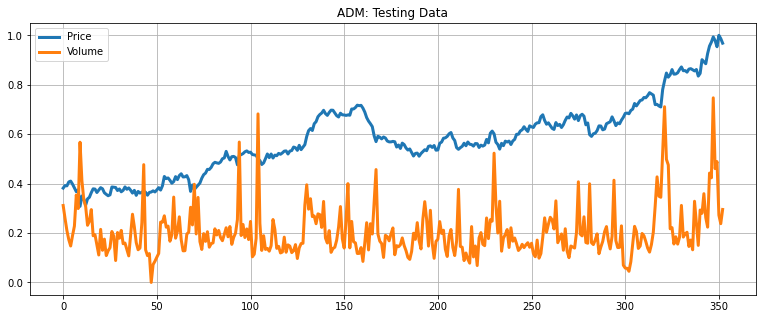

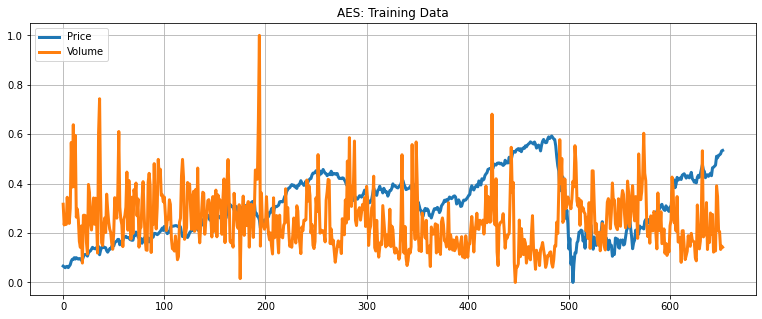

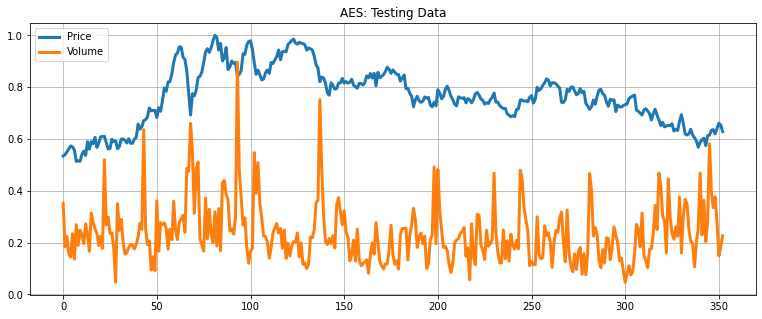

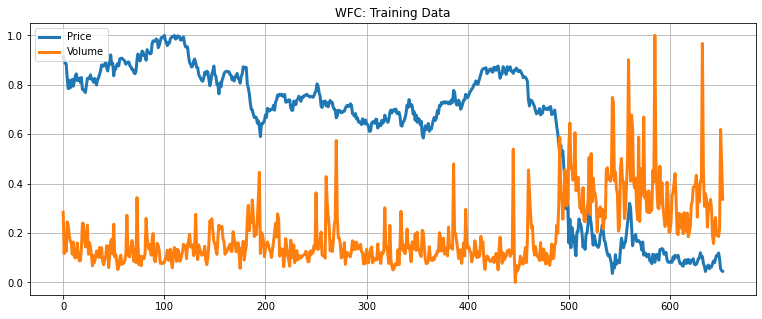

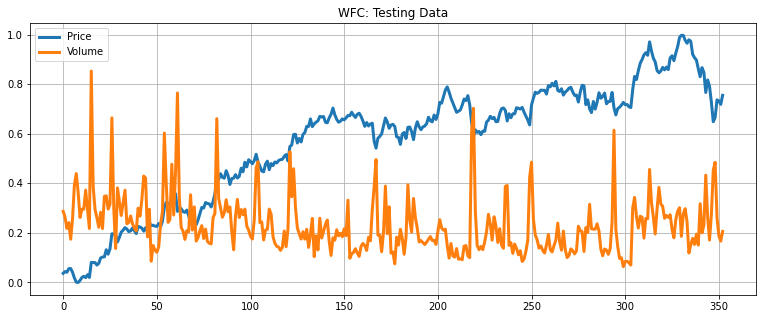

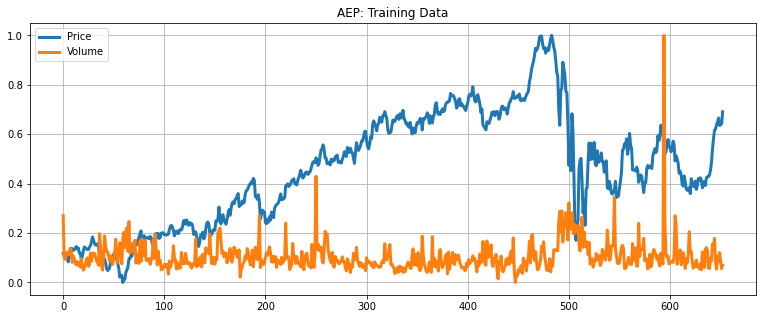

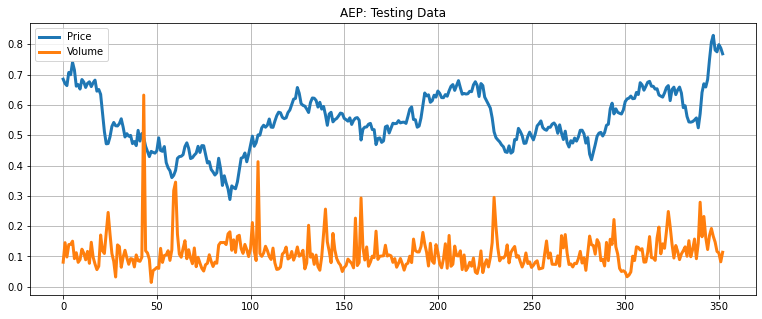

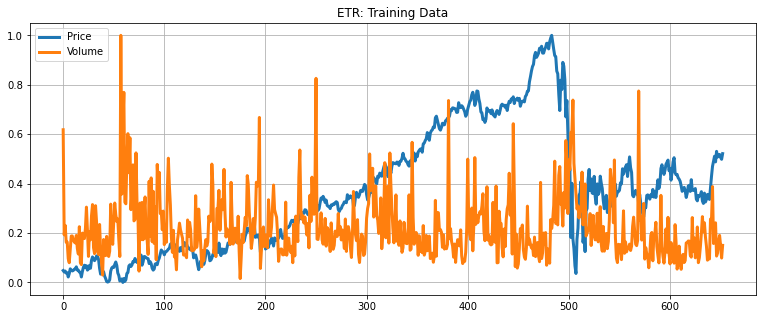

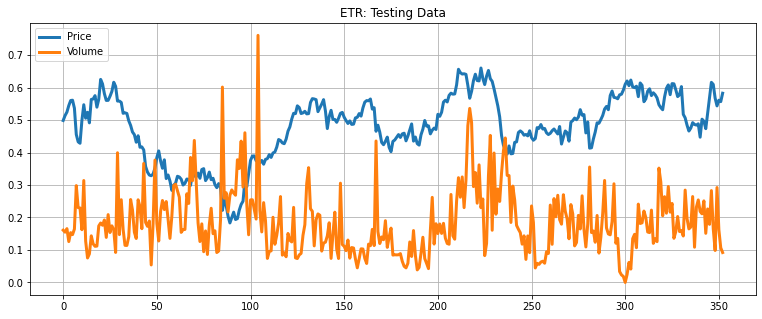

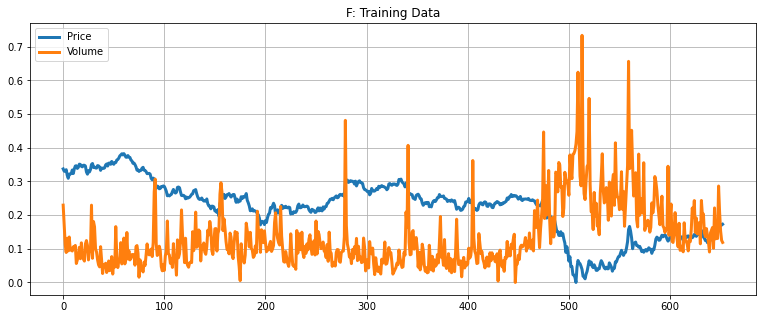

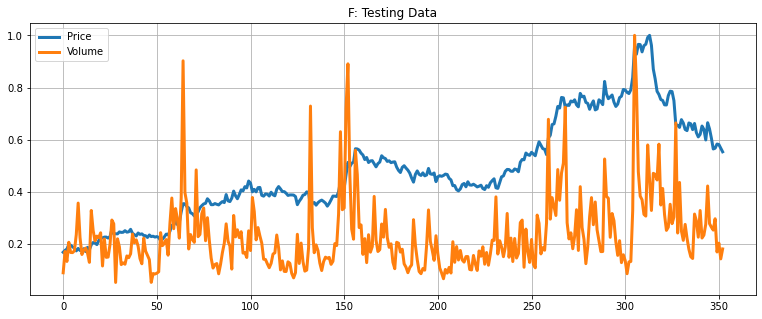

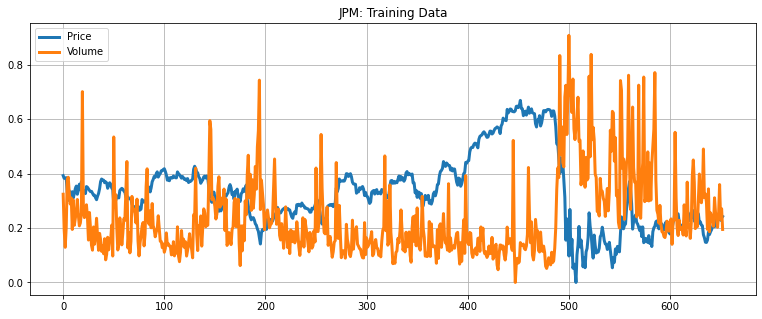

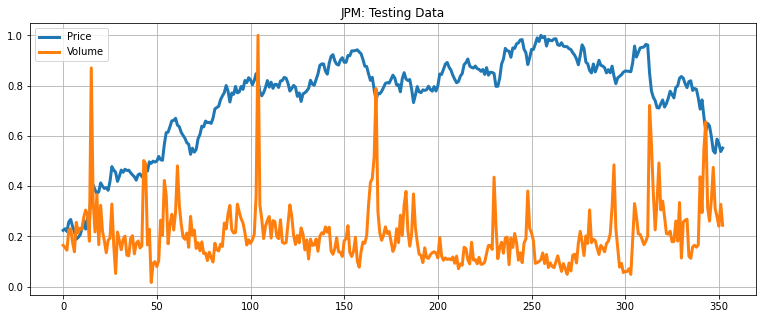

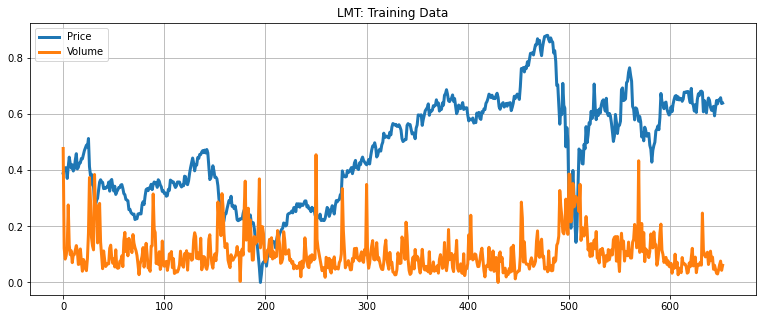

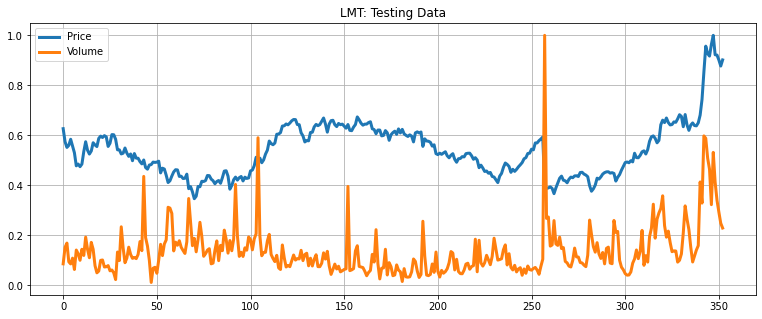

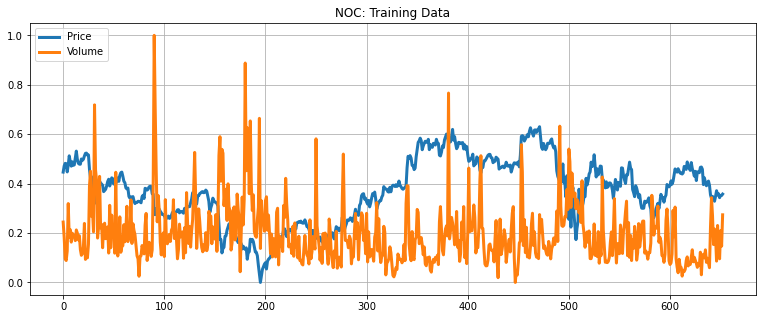

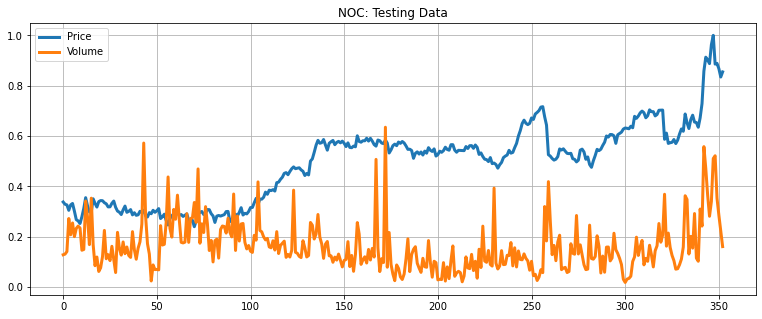

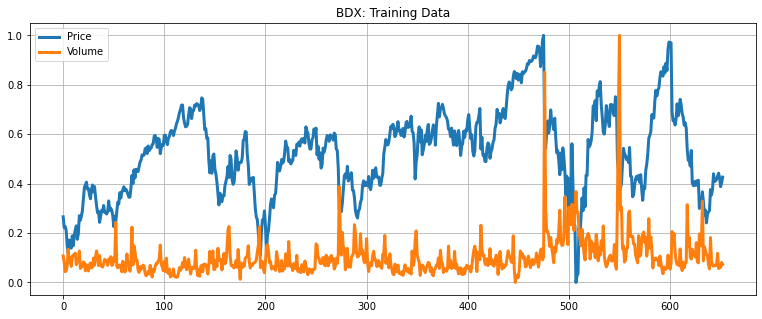

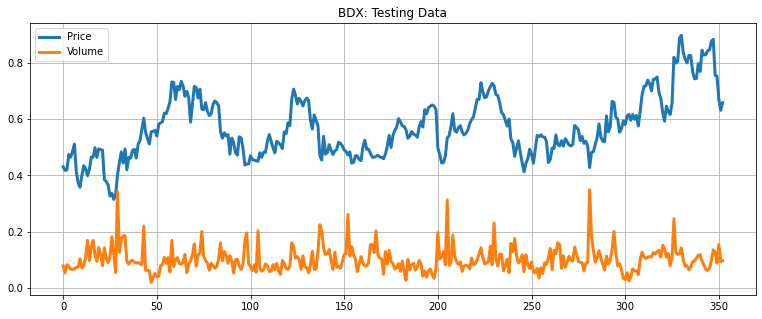

In [26]:
for ticker in top_esg['Ticker']:
    generate_prediction(stock_price_df, stock_vol_df, ticker)

# Benefits

1. Easier to implement, interpret and efficient to train.

2. Ridge model used in this case helps to contain overfitting of the data.

# Limitations

1. Our model does not account for broker fees or taxes which may vary and effect the data as the data is over a period of time(4-5 years).

2. There are other models like ARIMA, facebook prophet, LSTM which can handle Non-stationary behaviors.